Load the Data

In [10]:
import pandas as pd

# Load the Data
customers_df = pd.read_csv('data/customers.csv')
orders_df = pd.read_csv('data/order.csv')

# Output the first few rows of each DataFrame to verify loading
print("Customers DataFrame:")
print(customers_df.head())
print("\nOrders DataFrame:")
print(orders_df.head())

Customers DataFrame:
   customer_id            name                       email
0            8  customer three         customer3@gmail.com
1            9  Shafran Naizer        mshafran13@gmail.com
2           10  Isuri Liyanage  liyanage.isukavi@gmail.com
3           12  Shafran Naizer            shafran@ieee.org
4           13          sss ss                 ss@ieee.org

Orders DataFrame:
      id display_order_id  total_amount           created_at  customer_id
0  13392             YTFA           425  2024-10-14 15:12:43       1251.0
1  13393             N1U7          1650  2024-10-14 15:17:25       1251.0
2  13394             PADV          1365  2024-10-14 17:02:16        468.0
3  13395             OKVW           525  2024-10-14 17:03:36       1251.0
4  13396             2G3Q           525  2024-10-14 17:04:49        468.0


Data Preprocessing

In [11]:
# Check if required columns exist
if 'customer_id' not in customers_df.columns or 'name' not in customers_df.columns:
    raise ValueError("customers.csv must contain 'customer_id' and 'name' columns.")

# Remove rows with missing customer_id or name
customers_df.dropna(subset=['customer_id', 'name'], inplace=True)
customers_df = customers_df[['customer_id', 'name']].rename(columns={'name': 'customer_name'})

# Check for required columns in orders DataFrame
if 'id' not in orders_df.columns or 'total_amount' not in orders_df.columns or 'customer_id' not in orders_df.columns:
    raise ValueError("order.csv must contain 'id', 'total_amount', and 'customer_id' columns.")

# Remove rows with missing values
orders_df.dropna(subset=['id', 'total_amount', 'customer_id'], inplace=True)
processed_orders_df = orders_df[['id', 'total_amount', 'created_at', 'customer_id']]
processed_orders_df.rename(columns={'id': 'order_id', 'created_at': 'order_date'}, inplace=True)

# Output the cleaned DataFrames
print("\nCleaned Customers DataFrame:")
print(customers_df.head())
print("\nProcessed Orders DataFrame:")
print(processed_orders_df.head())


Cleaned Customers DataFrame:
   customer_id   customer_name
0            8  customer three
1            9  Shafran Naizer
2           10  Isuri Liyanage
3           12  Shafran Naizer
4           13          sss ss

Processed Orders DataFrame:
   order_id  total_amount           order_date  customer_id
0     13392           425  2024-10-14 15:12:43       1251.0
1     13393          1650  2024-10-14 15:17:25       1251.0
2     13394          1365  2024-10-14 17:02:16        468.0
3     13395           525  2024-10-14 17:03:36       1251.0
4     13396           525  2024-10-14 17:04:49        468.0


C:\Users\laksi\AppData\Local\Temp\ipykernel_23828\2546900602.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_orders_df.rename(columns={'id': 'order_id', 'created_at': 'order_date'}, inplace=True)


Feature Engineering

In [12]:
# Feature Engineering
customer_data = processed_orders_df.groupby('customer_id').agg(
    total_orders=pd.NamedAgg(column='order_id', aggfunc='count'),
    total_revenue=pd.NamedAgg(column='total_amount', aggfunc='sum')
).reset_index()

# Create the target variable for repeat purchase (1 if more than one order, else 0)
customer_data['repeat_purchase'] = (customer_data['total_orders'] > 1).astype(int)

# Output the customer data with aggregated features
print("\nCustomer Data with Features:")
print(customer_data.head())



Customer Data with Features:
   customer_id  total_orders  total_revenue  repeat_purchase
0          8.0            11          27500                1
1          9.0             2           6797                1
2         10.0            12          31200                1
3         12.0             7          17200                1
4         14.0           112         384436                1


Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X = customer_data[['total_orders', 'total_revenue']]
y = customer_data['repeat_purchase']

# Validate sufficient data for training
if len(customer_data) < 10:
    raise ValueError("Not enough data to train the model.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the shapes of the training and testing sets
print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (463, 2) (463,)
Testing Set Shape: (199, 2) (199,)


Model Implementation / Training

In [14]:
from sklearn.linear_model import LogisticRegression

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
# Output the model coefficients
print("\nLogistic Regression Model Coefficients:")
print(model.coef_)


Logistic Regression Model Coefficients:
[[ 1.22643177e-01 -5.45502013e-07]]


Validation Checks and Model Evaluation

In [16]:
from sklearn.metrics import accuracy_score

# Validation Checks and Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nLogistic Regression Model Accuracy:", accuracy)



Logistic Regression Model Accuracy: 0.24120603015075376


## Improved / Fine-Tuned model as a single code:

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Data
customers_df = pd.read_csv('data/customers.csv')
orders_df = pd.read_csv('data/order.csv')


# Data Preprocessing
customers_df.dropna(subset=['customer_id', 'name'], inplace=True)
customers_df = customers_df[['customer_id', 'name']].rename(columns={'name': 'customer_name'})

orders_df.dropna(subset=['id', 'total_amount', 'customer_id'], inplace=True)
processed_orders_df = orders_df[['id', 'total_amount', 'created_at', 'customer_id']]
processed_orders_df.rename(columns={'id': 'order_id', 'created_at': 'order_date'}, inplace=True)


# Feature Engineering
customer_data = processed_orders_df.groupby('customer_id').agg(
    total_orders=pd.NamedAgg(column='order_id', aggfunc='count'),
    total_revenue=pd.NamedAgg(column='total_amount', aggfunc='sum')
).reset_index()

# Create additional features
customer_data['avg_order_value'] = customer_data['total_revenue'] / customer_data['total_orders']
customer_data['order_frequency'] = customer_data['total_orders'] / (customer_data['total_orders'].count() + 1)  # Simple frequency

# Create the target variable for repeat purchase (1 if more than one order, else 0)
customer_data['repeat_purchase'] = (customer_data['total_orders'] > 1).astype(int)


# Train-Test Split
X = customer_data[['total_orders', 'total_revenue', 'avg_order_value', 'order_frequency']]
y = customer_data['repeat_purchase']

if len(customer_data) < 10:
    raise ValueError("Not enough data to train the model.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model Implementation with Regularization
# Define the model with regularization
model = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets


# Hyperparameter Tuning using Grid Search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


# Validation Checks and Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


# Print evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Regularization Strength (C):", grid_search.best_params_)
print("Logistic Regression Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



Best Regularization Strength (C): {'C': 0.001}
Logistic Regression Model Accuracy: 1.0
Confusion Matrix:
 [[153   0]
 [  0  46]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00        46

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199



C:\Users\laksi\AppData\Local\Temp\ipykernel_23828\2297806756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_orders_df.rename(columns={'id': 'order_id', 'created_at': 'order_date'}, inplace=True)


# Results as graphs

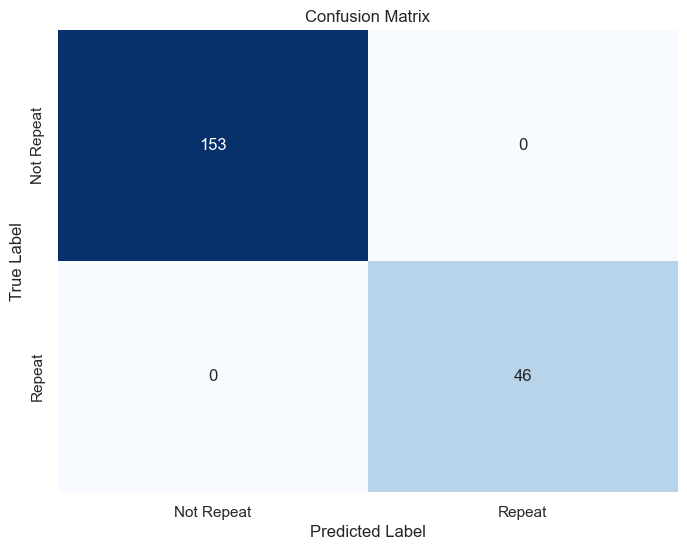

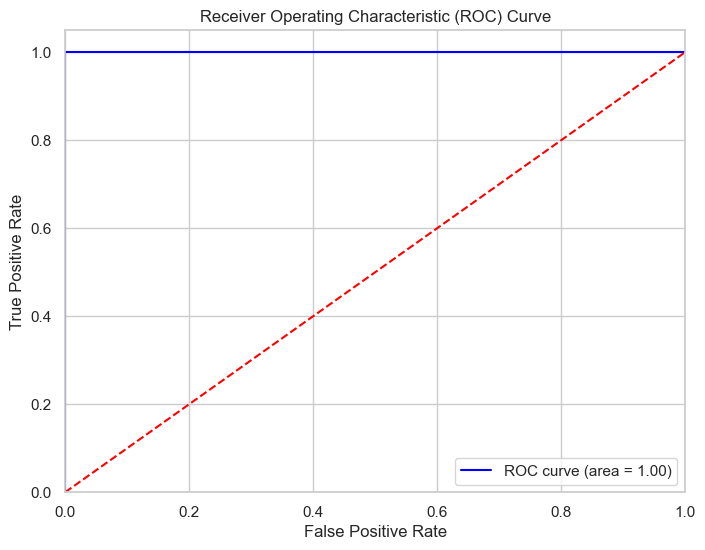

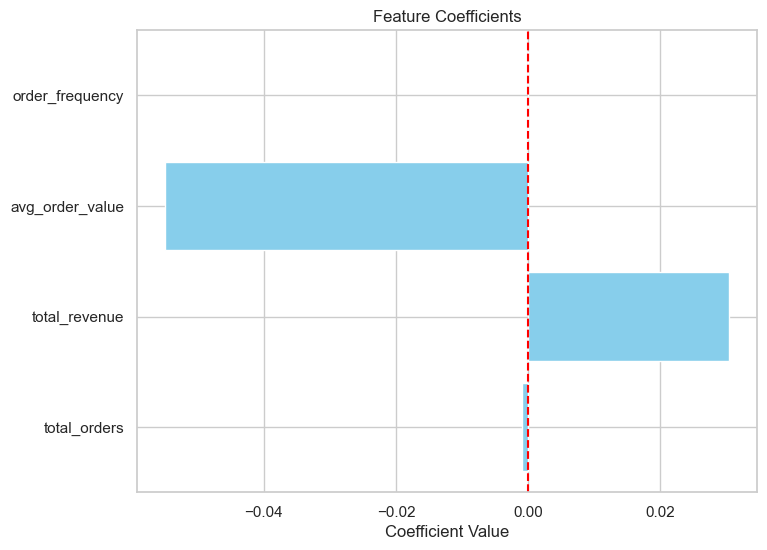

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Repeat', 'Repeat'], yticklabels=['Not Repeat', 'Repeat'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. ROC Curve
y_prob = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 3. Feature Importance Bar Chart
coefficients = best_model.coef_[0]  # Get the coefficients of the features
feature_names = X.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.axvline(0, color='red', linestyle='--')  # Vertical line at 0
plt.show()


Output:
# 1. Shows the number of correct and incorrect predictions made by the model
# 2. Indicates the overall ability of the model to classify correctly: here, value closer to 1 means better performance
# 3. Each bar represents the impact of a feature on the prediction